## Build a stock price prediction project in machine learning which utilizes historical stock market data,technical indicators, and machine learningalgorithms to forecast future stock prices.

In [1]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# Load the data
data = pd.read_csv('ADANIPORTS.csv')

In [3]:
# First five rows
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [4]:
# Last five rows
data.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942
3321,2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,9.366911e+14,132141.0,3514692,0.2789


In [5]:
# Shape of data
data.shape

(3322, 15)

In [6]:
# Columns in data
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [7]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [8]:
# Check Statistics of data
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [9]:
# Check Statistics of data for object
data.describe(include='O')

,Date,Symbol,Series
count,3322,3322,3322
unique,3322,2,1
top,2007-11-27,ADANIPORTS,EQ
freq,1,2299,3322


In [10]:
# Check missing values
data.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

## Preparing the Data

In [11]:
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

## Spliting data into training and testing sets

In [12]:
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

## Function to create LSTM dataset

In [13]:
def create_lstm_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:i + time_steps, 0])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

## Time steps for the LSTM

In [14]:
time_steps = 60

## Creating dataset

In [15]:
X_train, y_train = create_lstm_dataset(train_data, time_steps)
X_test, y_test = create_lstm_dataset(test_data, time_steps)

## Reshaping the data for input

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## Build the LSTM model

In [17]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

## Compile

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

## Train

In [19]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
82/82 [==============================] - 9s 59ms/step - loss: 0.0047
Epoch 2/10
82/82 [==============================] - 5s 56ms/step - loss: 9.3189e-04
Epoch 3/10
82/82 [==============================] - 7s 88ms/step - loss: 7.5566e-04
Epoch 4/10
82/82 [==============================] - 9s 106ms/step - loss: 6.8704e-04
Epoch 5/10
82/82 [==============================] - 7s 88ms/step - loss: 6.4225e-04
Epoch 6/10
82/82 [==============================] - 6s 77ms/step - loss: 5.3887e-04
Epoch 7/10
82/82 [==============================] - 6s 70ms/step - loss: 5.0844e-04
Epoch 8/10
82/82 [==============================] - 5s 66ms/step - loss: 4.3734e-04
Epoch 9/10
82/82 [==============================] - 5s 64ms/step - loss: 4.2884e-04
Epoch 10/10
82/82 [==============================] - 5s 64ms/step - loss: 4.2520e-04


## Making Predictions

In [20]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

19/19 [==============================] - 1s 28ms/step


In [21]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

## Ploting actual and predicted price

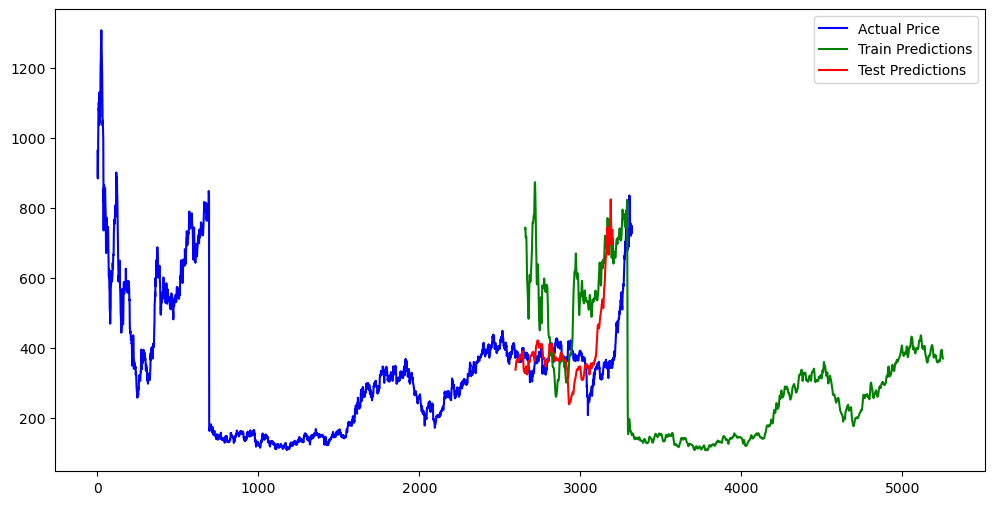

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(close_prices, color='blue', label='Actual Price')
plt.plot([None]*train_size + [x[0] for x in train_predictions], color='green', label='Train Predictions')
plt.plot([None]*len(train_predictions) + [x[0] for x in test_predictions], color='red', label='Test Predictions')
plt.legend()
plt.show()